<a href="https://colab.research.google.com/github/PhoebeLu1011/1132code/blob/main/week5%E9%9A%A8%E5%A0%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [ ]:
import pandas as pd
# read data and put it in a dataframe
# 在 google 工作表載入 gsheets
gsheets = gc.open_by_url('https://docs.google.com/spreadsheets/d/1-gIkiztumiPgnDV5PnLzbNmj8mb48EZOhhbajMYrEGs/edit?usp=sharing')

In [ ]:
gsheets

<Spreadsheet 'mood_tracking' id:1-gIkiztumiPgnDV5PnLzbNmj8mb48EZOhhbajMYrEGs>

In [ ]:
from gspread_dataframe import set_with_dataframe

# 選擇要更新的工作表（選擇第一個工作表）
worksheet = gsheets.get_worksheet(0)  # 如果是其他工作表，可以用 get_worksheet(index)

In [ ]:
from google.colab import userdata
apikey = userdata.get('GOOGLE_API_KEY')

In [ ]:
# 取得 Google Sheets 內容
data = worksheet.get_all_values()
df = pd.DataFrame(data)

In [ ]:
df

,Day,Mood,Stress Level,Energy Level,Main Activity,Notes
1,1,Happy,3,4,Watching TV,Worked overtime
2,2,Stressed,8,4,Watching TV,Met friends
3,3,Sad,9,10,Exercise,Met friends
4,4,Happy,10,8,Meditation,Took a walk
5,5,Tired,3,9,Socializing,Worked overtime
6,6,Excited,10,10,Reading,Relaxed at home
7,7,Happy,1,2,Reading,Had good sleep
8,8,Sad,2,7,Socializing,Worked overtime
9,9,Sad,8,4,Watching TV,Worked overtime
10,10,Happy,9,9,Meditation,Felt productive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 取得 Google Sheets 內容
data = worksheet.get_all_values()  # 取得所有資料（2D 陣列）

# 轉換成 DataFrame
df = pd.DataFrame(data)

# 設定第一列為標題
df.columns = df.iloc[0]  # 第一列當作標題
df = df[1:]  # 刪除原本的標題列



In [ ]:
# 將數字欄位轉換成數值類型
df["Day"] = pd.to_numeric(df["Day"])
df["Energy Level"] = pd.to_numeric(df["Energy Level"])
df["Stress Level"] = pd.to_numeric(df["Stress Level"])

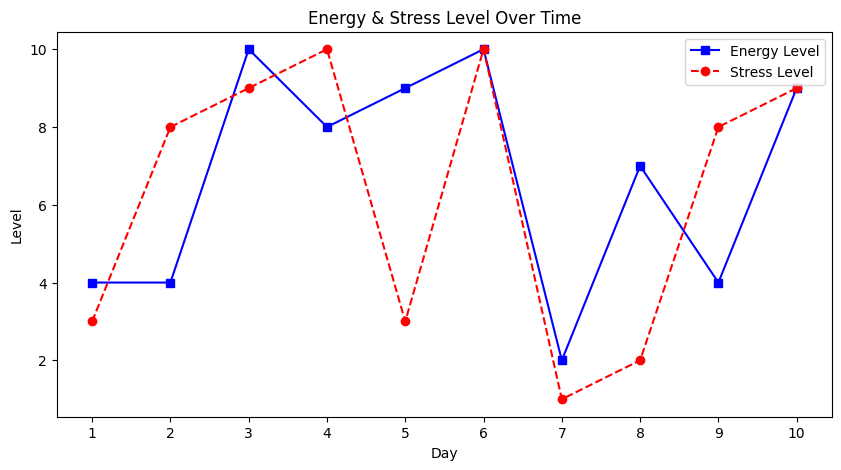

In [ ]:
# 繪製圖表
plt.figure(figsize=(10, 5))

# 繪製 Energy Level
plt.plot(df["Day"], df["Energy Level"], marker='s', linestyle='-', color='blue', label="Energy Level")

# 繪製 Stress Level（合併另一條線）
plt.plot(df["Day"], df["Stress Level"], marker='o', linestyle='--', color='red', label="Stress Level")

# 設定標題和標籤
plt.title("Energy & Stress Level Over Time")
plt.xlabel("Day")
plt.ylabel("Level")
plt.xticks(df["Day"])  # 設定 X 軸刻度
plt.legend()  # 顯示圖例
plt.show()